In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((26.01,26.72,25.24,25.63,25.66,24.87,24.68,24.92,26.72,27.76,26.54,27.75,27.56,27.02,26.97,
                 26.47,26.12,26.64,27.02,27.32,27.19,26.15,26.28,26.87,26.71,26.89,26.87,26.35,26.23,25.59,
                 26.5,23.74,25.83,25.47,25.72,25.6,25.38,25.67,25.16,26.13,24.44,26.36,24.56,25.9,25.54,
                 26,24.64,26.64,25.14,25.68,24.6,26.09,25.03,25.78,25.25,25.93,24.84,26.01,25.02,26.61))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,26.01
1,26.72
2,25.24
3,25.63
4,25.66


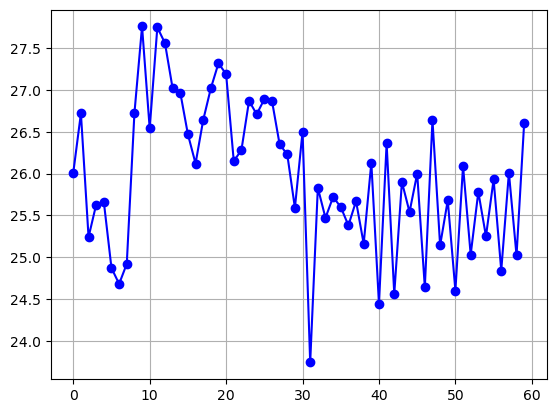

In [2]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.002


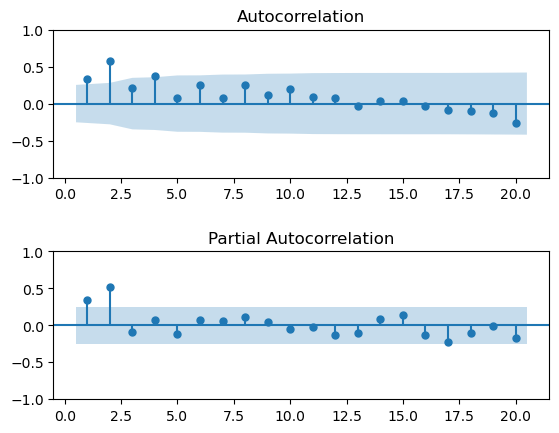

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


In [4]:
df['lag1'] = df['Xbar'].shift(1)
# and split the dataset into regressors and target
X = df.iloc[1:, 1:]
y = df.iloc[1:, 0]

In [5]:
df['fits']=9.5+0.64*df['lag1']
df['resid']=df['Xbar']-df['fits']
df['MR']=df['resid'].diff().abs()

In [6]:
# Create columns for the upper and lower control limits
mean_resid=0
std_resid=0.65
alpha=1/371
K_alpha=stats.norm.ppf(1-alpha/2)

d2 = 1.128
D4 = 3.267
MRbar=d2*std_resid

df['I_UCL'] = mean_resid + K_alpha*std_resid
df['I_CL'] = mean_resid
df['I_LCL'] =mean_resid - K_alpha*std_resid
df['MR_UCL'] = D4 * MRbar
df['MR_CL'] = MRbar
df['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
df.head()

,Xbar,lag1,fits,resid,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,26.01,NaN,NaN,NaN,NaN,1.950321,0,-1.950321,2.395364,0.7332,0
1,26.72,26.01,26.1464,0.5736,NaN,1.950321,0,-1.950321,2.395364,0.7332,0
2,25.24,26.72,26.6008,-1.3608,1.9344,1.950321,0,-1.950321,2.395364,0.7332,0
3,25.63,25.24,25.6536,-0.0236,1.3372,1.950321,0,-1.950321,2.395364,0.7332,0
4,25.66,25.63,25.9032,-0.2432,0.2196,1.950321,0,-1.950321,2.395364,0.7332,0


In [7]:

# Define columns for possible violations of the control limits
df['I_TEST1'] = np.where((df['resid'] > df['I_UCL']) | 
                (df['resid'] < df['I_LCL']), df['resid'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df.head()

,Xbar,lag1,fits,resid,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,26.01,NaN,NaN,NaN,NaN,1.950321,0,-1.950321,2.395364,0.7332,0,NaN,NaN
1,26.72,26.01,26.1464,0.5736,NaN,1.950321,0,-1.950321,2.395364,0.7332,0,NaN,NaN
2,25.24,26.72,26.6008,-1.3608,1.9344,1.950321,0,-1.950321,2.395364,0.7332,0,NaN,NaN
3,25.63,25.24,25.6536,-0.0236,1.3372,1.950321,0,-1.950321,2.395364,0.7332,0,NaN,NaN
4,25.66,25.63,25.9032,-0.2432,0.2196,1.950321,0,-1.950321,2.395364,0.7332,0,NaN,NaN


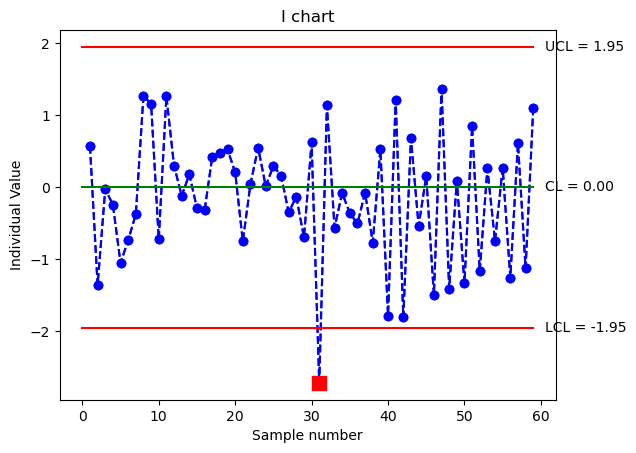

In [8]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['resid'], color='b', linestyle='--', marker='o')
plt.plot(df['resid'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

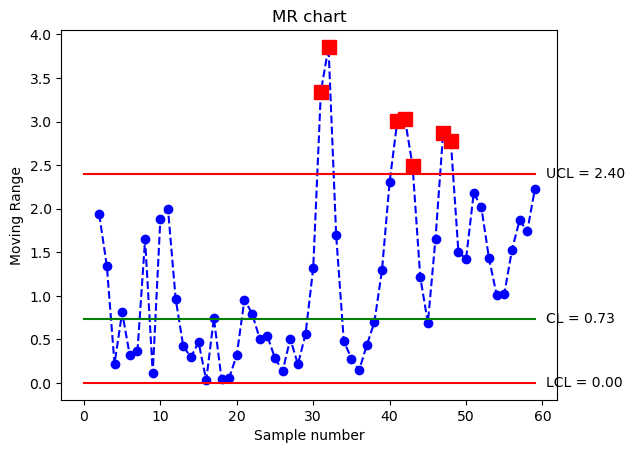

In [9]:
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

>## Point 2

In [27]:
K=3.205

b0_CL=9.5
b0_UCL=b0_CL+K*np.sqrt(6.5)
b0_LCL=b0_CL-K*np.sqrt(6.5)

b1_CL=0.64
b1_UCL=b1_CL+K*np.sqrt(0.0196)
b1_LCL=b1_CL-K*np.sqrt(0.0196)

> ## point 3

In [18]:
# and split the dataset into regressors and target
import statsmodels.api as sm

x1 = df.iloc[1:30,1]
x1 = sm.add_constant(df['lag1'][1:30])
y1 = df.iloc[1:30, 0]
model1 = sm.OLS(y1, x1).fit()

qda.summary(model1)

REGRESSION EQUATION
-------------------
Xbar =  + 9.595 const + 0.637 lag1

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value  P-Value
const 9.5945   4.0212   2.3860   0.0243
 lag1 0.6368   0.1519   4.1909   0.0003

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.6601 0.3941     0.3717

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value  P-Value
Regression  1.0  7.6542  7.6542  17.5638   0.0003
     const  1.0  2.4809  2.4809   5.6929   0.0243
      lag1  1.0  7.6542  7.6542  17.5638   0.0003
     Error 27.0 11.7664  0.4358      NaN      NaN
     Total 28.0 19.4206     NaN      NaN      NaN


Shapiro-Wilk test p-value on the residuals = 0.744


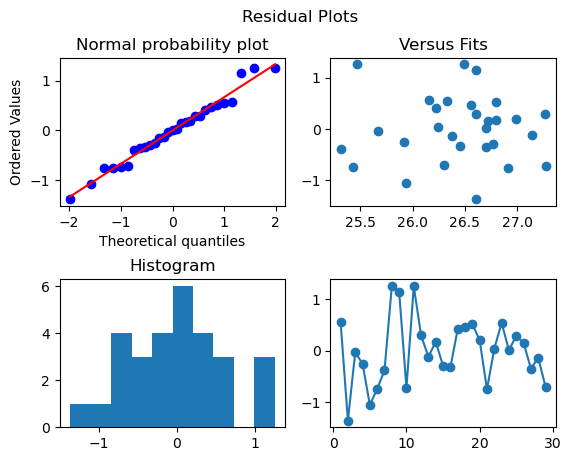

In [19]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model1.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model1.fittedvalues, model1.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model1.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model1.resid)+1), model1.resid, 'o-')
_, pval_SW_res = stats.shapiro(model1.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.187


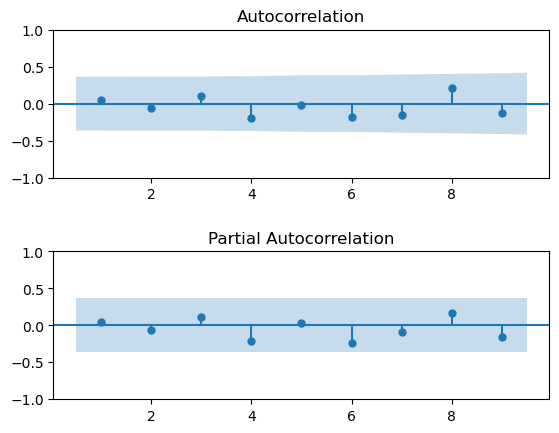

In [20]:
_, pval_runs_res = runstest_1samp(model1.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model1.resid, lags = int(len(df['lag1'][1:30])/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model1.resid, lags = int(len(df['lag1'][1:30])/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

> month july

In [22]:
# and split the dataset into regressors and target
import statsmodels.api as sm

x2 = df.iloc[30:,1]
x2 = sm.add_constant(df['lag1'][30:])
y2 = df.iloc[30:, 0]
model2 = sm.OLS(y2, x2).fit()

qda.summary(model2)

REGRESSION EQUATION
-------------------
Xbar =  + 45.079 const -0.768 lag1

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const 45.0788   3.4284  13.1488 1.6731e-13
 lag1 -0.7682   0.1345  -5.7102 4.0028e-06

MODEL SUMMARY
-------------
     S  R-sq  R-sq(adj)
0.4813 0.538     0.5215

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  1.0  7.5546  7.5546  32.6062 4.0028e-06
     const  1.0 40.0575 40.0575 172.8914 1.6731e-13
      lag1  1.0  7.5546  7.5546  32.6062 4.0028e-06
     Error 28.0  6.4874  0.2317      NaN        NaN
     Total 29.0 14.0419     NaN      NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.811


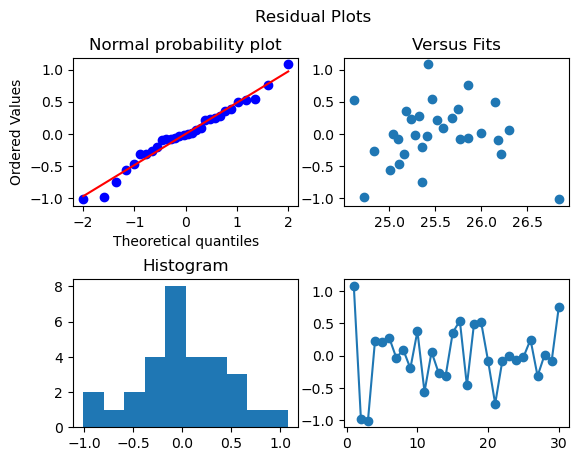

In [23]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model2.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model2.fittedvalues, model2.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model2.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model2.resid)+1), model2.resid, 'o-')
_, pval_SW_res = stats.shapiro(model2.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.252


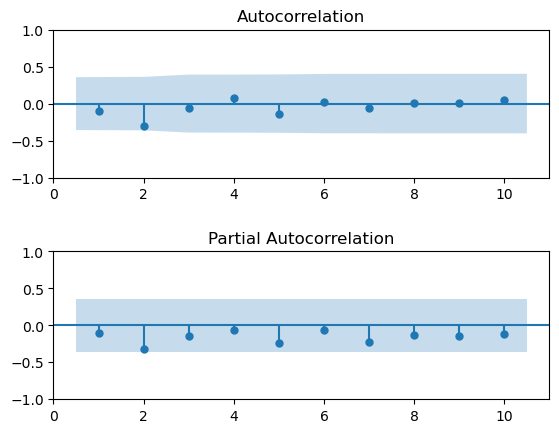

In [24]:
_, pval_runs_res = runstest_1samp(model2.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model2.resid, lags = int(len(df['lag1'][30:])/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model2.resid, lags = int(len(df['lag1'][30:])/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

>## EX3

In [37]:
gamma_l=stats.norm.cdf((18-20)/1)
gamma_u=1-stats.norm.cdf((22-20)/1)
prob_nonconforming=gamma_l+gamma_u
prob_conforming=1-prob_nonconforming
print(prob_conforming)
cost=prob_conforming*60*0.1+prob_nonconforming*60*2
print(cost)

0.9544997361036416
11.187030084184858


In [38]:
gamma_l=stats.norm.cdf((18-21)/1)
gamma_u=1-stats.norm.cdf((22-21)/1)
prob_nonconforming=gamma_l+gamma_u
prob_conforming=1-prob_nonconforming
print(prob_conforming)
cost=prob_conforming*60*0.1+prob_nonconforming*60*2
print(cost)

0.8399948480369128
24.240587323791935
